# Design de Filtros Digitais

Filtros são uma classe de sistemas ineares invariantes no tempo particularmente importantes. Em um contexto mais amplo, qualquer sistema que modifique algumas frequências relativamente a outras, é chamado de filtro. Mais estritamente falando, a ênfase primária desse estudo tratará dos filtros **seletores de frequência**, mas as abordagens também podem ser estendidas para apicações mais amplas. Esse estudo se concentrará no design de filtros causais. Em geral, filtros não causais partem do design de filtros causais.
O design de filtros obedecem os seguintes estágios:
1. Especificação das propriedades desejadas do sistema;
2. Aproximação das especificações utilizando um sistema de tempo discreto causal;
3. Construção do sistema.

Nesse estudo, focaremos no segundo passo, uma vez que o primeiro é altamente dependente da aplicação, e o terceiro dependente da tecnologia usada para a implementação. Vale ressaltar que o processamento de sinais discretos no tempo é feito por comuptadores de forma digital, e apesar de que os filtros apresentados aqui tratem apenas da natureza discreta dos sinais e sistemas, comumente nos referimos a esse tipo de filtro como **filtros digitais**.

## 1. Design de Filtros IIR a partir de filtros de tempo contínuo

O design de filtros IIR(*infinite impulse response*) digitais pode ser realizado por meio de aproximações de filtros IIR contínuos, supondo que as especificações do sistema a ser projetoado foram estabelecidas em tempo discreto. Usaremos aproximações para filtros de tempo contínuo apenas por conveniência para determinar as características do filtro digital que compram os requisistos do sistema. De fato, a resposta em frequência do filtro de tempo contínuo que aproximamos pode ser muito diferente da resposta do filtro digital.

O design de filtros digitais obtidos por meio da transformação de filtros contínuos no tempo parte da transformação dos requisitos do sistema para o tempo contínuo, obtemos a resposta $H_c(s)$ e a resposta ao impulso $h_c(t)$ e a partir de uma transformação, obtemos a resposta $H(z)$ e a resposta ao impulso $h[n]$ do sistema discreto. EM geral, requerimos que as propriedades essenciais do sistema contínuo se mantenham no domínio discreto, em outras palavras, desejamos que o eixo imaginário do plano *s* seja mapeado no círculo unitário no plano *z*, e que a estabilidade do sistema contínuo se mantenha no sistema discreto, ou seja, que os polos do sistema no plano *s* estejam à esquerda do eixo imaginário, e sejam mapeados em polos dentro do cículo unitário no plano *z*. Essas exigências são básicas para todas as técnicas que seram discutidas nessa seção.

### 1.1 Design de Filtro por Invariância de Impulso

Na seção 4.42 do livro do Openheim, discute-se o conceito de invariância de impulso, ode um sistema em tempo discreto é definido pela amostragem da resposta ao impuldo de  um sistema de tempo contínuo. A invariância de impulso fornece um meio direto de calcular amostras da saída de um sistema limitado em banda para sinais de entrada limitados em banda. No projeto de filtros, podemos pensar nela como um método para obter um sistema discreto cuja resposta em frequência é determinada pela resposta em frequência de um sistema de tempo contínuo.

Nesse procedimento, a resposta ao impulso do filtro digital é escolhido proporcionalmente a amostras igualmente espaçadas da resposta ao impulso do filtro de tempo contínuo, isto é:

$$
h[n] = T_dh_c(nT_d) \tag{1.1}
$$

Onde $T_d$ é o período de amostragem.

A resposta em frequência do sistema de tempo discreto se relaciona com a respostea em frequência do sistema de tempo contínuo a partir da equação:

$$
H(e^{j\omega}) = \sum_{k=-\infty}^{\infty} H_c \left( \frac{j\omega}{T_d} + \frac{j2\pi k}{T_d} \right) \tag{1.2}
$$

Se o filtro de tempo contínuo for limitado em banda, tal que:

$$
H_c(j\Omega) = 0, \quad |\Omega| \geq \pi / T_d, \tag{1.3}
$$

então:

$$
H(e^{j\omega}) = H_c \left( \frac{j\omega}{T_d} \right), \quad |\omega| \leq \pi; \tag{1.4}
$$

No procedimento  de design por invariância de impulso, a rpiori, as especificações do sistema em tempo discreto são transofrmadas para o tempo contínuo por meio da Eq.(1.2). Assumindo que o *aliasing* envolvido na na transformação de $H_c(j\Omega)$ para $H(e^{j\omega})$ é negligenciado, nós obtemos as especificações em $H_c(j\Omega)$ aplicando a relação:

$$
\Omega = \omega/T_d \tag{1.5}
$$

Após obter um filtro de tempo contínuo aceitável com base nessas especificações, tranformamos a sua resposta em frequência para a resposta em frequência do filtro de tempo discreto, cujos detalhes algébricos serão desenvolvidos brevemente. Note que devido à natureza dessa tranformação, que implica no uso da relação estavelecida na Eq.(1.5), o termo $T_d$ não pode ser usado para controlar o *aliasing*. Uma vez que a frequência de amostragem aumenta, a frequência de corte do filtro de tempo contínuo deve aumentar de forma proporcional. Na prática, para compensar o possível *aliasing* nesa transformação, o filtro de tempo contínuo deve ser superprojetado de alguma maneira, de forma a exceder as especificações, particularmente na faixa de rejeição.

Para desenvolver essa transforamção do tempo contínuo para o tempo discreto, descrevemos a função do sistema de tempo contínuo em termos de uma expansão de frações parciais:

$$
H_c(s) = \sum_{k=1}^{N} \frac{A_k}{s - s_k} \tag{1.6}
$$

A função do filtro de tempo discreto é dada então, por:

$$
H(z) = \sum_{k=1}^{N} \frac{T_d A_k}{1 - e^{s_k T_d} z^{-1}} \tag{1.7}
$$

Note que um polo em $s =  s_k$ é mapeado em $z = e^{s_kT_d}$, o que significa que se o sistema for estável no tempo contínuo, também o será no tempo discreto. Esse procedimento é raramente utilizado computacionalmente para o design do filtro digital, uma vez que a Eq.(1.7) apresenta uma exponencial, cuja computação é ineficiente, e não considera explicitamente os efeitos de *aliasing* no sistema. para isso, o próximo procedimento utilizado é o da aproximação Bilinear.

In [29]:
import numpy as np
from scipy.optimize import fsolve

def butterworth_solver(fs, at_passband, at_stopband, passband, stopband):
    """
    Calcula a ordem do filtro (N) e a frequência de corte (Omega_c) para um filtro Butterworth analógico.

    Parâmetros:
        fs (float): Frequência de amostragem.
        at_passband (float): Atenuação na banda de passagem (linear).
        at_stopband (float): Atenuação na banda de rejeição (linear).
        passband (float): Frequência de passagem normalizada (0 a 0.5).
        stopband (float): Frequência de rejeição normalizada (0 a 0.5).

    Retorna:
        tuple: Ordem do filtro (N) e frequência de corte (Omega_c).
    """

    def butterworth_equations(vars):
        N, Omega_c = vars
        # Garantir que Omega_c não seja zero ou negativo
        if Omega_c <= 0:
            return [np.inf, np.inf]

        # Transformação bilinear para frequências analógicas
        passband_analog = fs*passband
        stopband_analog = fs*stopband

        # Equações baseadas na equação 7.16
        eq1 = 1 / np.sqrt(1 + (passband_analog/ Omega_c)**(2 * N)) - at_passband
        eq2 = 1 / np.sqrt(1 + (stopband_analog / Omega_c)**(2 * N)) - at_stopband
        return [eq1, eq2]

    # Palpite inicial refinado
    initial_guess = [2, 1]

    # Solução numérica usando fsolve
    solution = fsolve(butterworth_equations, initial_guess)
    N, Omega_c = solution

    # Validar resultados e arredondar N
    if Omega_c <= 0 or N <= 0:
        raise ValueError("Solução inválida encontrada. Verifique os parâmetros iniciais ou equações.")
    
    N = int(np.ceil(N))  # Arredondar ordem para cima
    return N, Omega_c

# Parâmetros do sistema
fs = 1
at_passband = 0.89125
at_stopband = 0.17783
passband = 0.2*np.pi
stopband = 0.3*np.pi

# Executar o cálculo para obter N e Omega_c
try:
    N, Omega_c = butterworth_solver(fs, at_passband, at_stopband, passband, stopband)
    print(f"Ordem do filtro (N): {N}")
    print(f"Frequência de corte (Omega_c): {Omega_c:.5f}")
except ValueError as e:
    print(e)


Ordem do filtro (N): 6
Frequência de corte (Omega_c): 0.70474


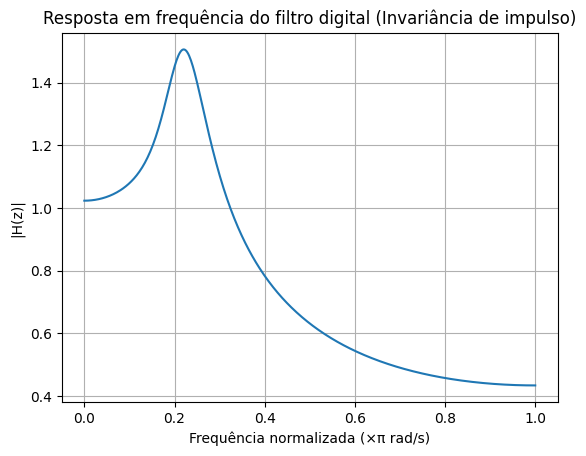

In [34]:
import numpy as np

def impulse_invariance(N, Omega_c, fs, freq_range):
    """
    Calcula a resposta em frequência de um filtro Butterworth digital usando o método de invariância de impulso.

    Parâmetros:
        N (int): Ordem do filtro Butterworth.
        Omega_c (float): Frequência de corte do filtro contínuo (em rad/s).
        fs (float): Frequência de amostragem do sistema discreto.
        freq_range (array): Intervalo de frequências em rad/s para análise.

    Retorna:
        array: Resposta em frequência do filtro digital.
    """
    # Coeficientes do filtro contínuo (raízes s_k)
    s_k = Omega_c * np.exp(1j * (np.pi * (2 * np.arange(1, N + 1) - 1) / (2 * N) + np.pi / 2))
    
    # Resposta em frequência no domínio discreto
    T_d = 1 / fs  # Período de amostragem
    H_d = np.zeros_like(freq_range, dtype=complex)
    
    for k in range(N):
        # Coeficiente de transformação
        A_k = np.abs(Omega_c / N)  # Normalização simplificada
        z_k = np.exp(s_k[k] * T_d)  # Transformação discreta
        
        # Somatório para H(z)
        H_d += T_d * A_k / (1 - z_k * np.exp(-1j * freq_range))
    
    return np.abs(H_d)

# Parâmetros do filtro
N = 6  # Ordem do filtro calculado anteriormente
Omega_c = 0.70474  # Frequência de corte do filtro contínuo
fs = 1  # Frequência de amostragem

# Faixa de frequências para análise (em rad/s)
freq_range = np.linspace(0, np.pi, 500)  # Frequências de 0 a π rad/s

# Cálculo da resposta em frequência
H_digital = impulse_invariance(N, Omega_c, fs, freq_range)

# Exibição dos resultados
import matplotlib.pyplot as plt
plt.plot(freq_range / np.pi, H_digital)
plt.title("Resposta em frequência do filtro digital (Invariância de impulso)")
plt.xlabel("Frequência normalizada (×π rad/s)")
plt.ylabel("|H(z)|")
plt.grid()
plt.show()
